In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_seq_items = 2000

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from models import random_forest_model as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# First Model Experiments

### Data Preparation

In [478]:
journey_train_18 = pd.read_csv('../data/processed/journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_test_19 = pd.read_csv('../data/processed/journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [ ]:
copy_train = journey_train_18.copy()
copy_test = journey_test_19.copy()

In [ ]:
journey_train_18.head(2)

,rental_id,end_date,end_station_name,start_date,start_station_name,day_of_week,hour,is_weekend,part_of_day,month,...,election_seats_percentage_lab,election_seats_percentage_ld,election_seats_percentage_gre,election_seats_percentage_ind,occupation_high_level_ratio_ratio,occupation_small_intermediate_ratio_ratio,occupation_lower_level_ratio_ratio,occupation_unemployed_ratio_ratio,occupation_student_ratio_ratio,earnings_workplace
0,72337672.0,2018-01-01 00:07:00,"Millbank Tower, Pimlico",2018-01-01 00:00:00,"Grosvenor Road, Pimlico",0,0,0.0,5,1.0,...,0.32,0.00,0.0,0.0,0.443089,0.161098,0.148262,0.118178,0.129374,60046.0
1,72337673.0,2018-01-01 01:16:00,"South Parade, Chelsea",2018-01-01 00:02:00,"South Parade, Chelsea",0,0,0.0,5,1.0,...,0.26,0.02,0.0,0.0,0.460353,0.177567,0.144639,0.104780,0.112661,41723.0


In [ ]:
x_train, y_train, x_test, y_test, train_all = model.aggregate_demand_hourly(journey_train_18, journey_test_19)

In [ ]:
print("Shape x_train and y_train",  x_train.shape, y_train.shape)

Shape x_train and y_train (8152, 106) (8152,)


In [ ]:
x_train.head()

,day_of_week,hour,is_weekend,part_of_day,month,season,bank_holiday,tempmax,tempmin,temp,...,start_borough_Hackney,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster
0,0,0,0.0,5,1.0,4,1.0,8.1,6.1,7.1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.0,5,1.0,4,1.0,8.1,6.1,7.1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,5,1.0,4,1.0,8.1,6.1,7.1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0.0,5,1.0,4,1.0,8.1,6.1,7.1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0.0,5,1.0,4,1.0,8.1,6.1,7.1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_train.head()

0    90
1    72
2     7
3     9
4     6
Name: demand, dtype: int64

### Model: Random Forest, Basic

In [ ]:
# fit and predict
rf, y_pred = model.random_forest_fit_pred(x_train, y_train, x_test)

In [ ]:
# feature importance
print(model.get_feature_importance(rf, x_train))

                                       Feature    Importance
1                                         hour  3.231764e-01
3                                  part_of_day  1.637249e-01
36                     ethnic_arab_other_ratio  6.478847e-02
76               residence_lengh_uk_born_ratio  6.403999e-02
15                                  cloudcover  5.298362e-02
0                                  day_of_week  4.570340e-02
33              ethnic_african_caribbean_ratio  4.468204e-02
12                                      precip  3.211036e-02
20                                 day_of_year  2.425377e-02
16                                  visibility  1.825166e-02
18                              daylight_hours  1.622618e-02
14                                   windspeed  1.202050e-02
19                                day_of_month  1.109648e-02
10                                   feelslike  1.097654e-02
47       highes_education_apprenticeship_ratio  9.786059e-03
9                       

In [ ]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 65.84245888475495
MAE: 31.289827535808243
R2 Score: 0.7103726887807438


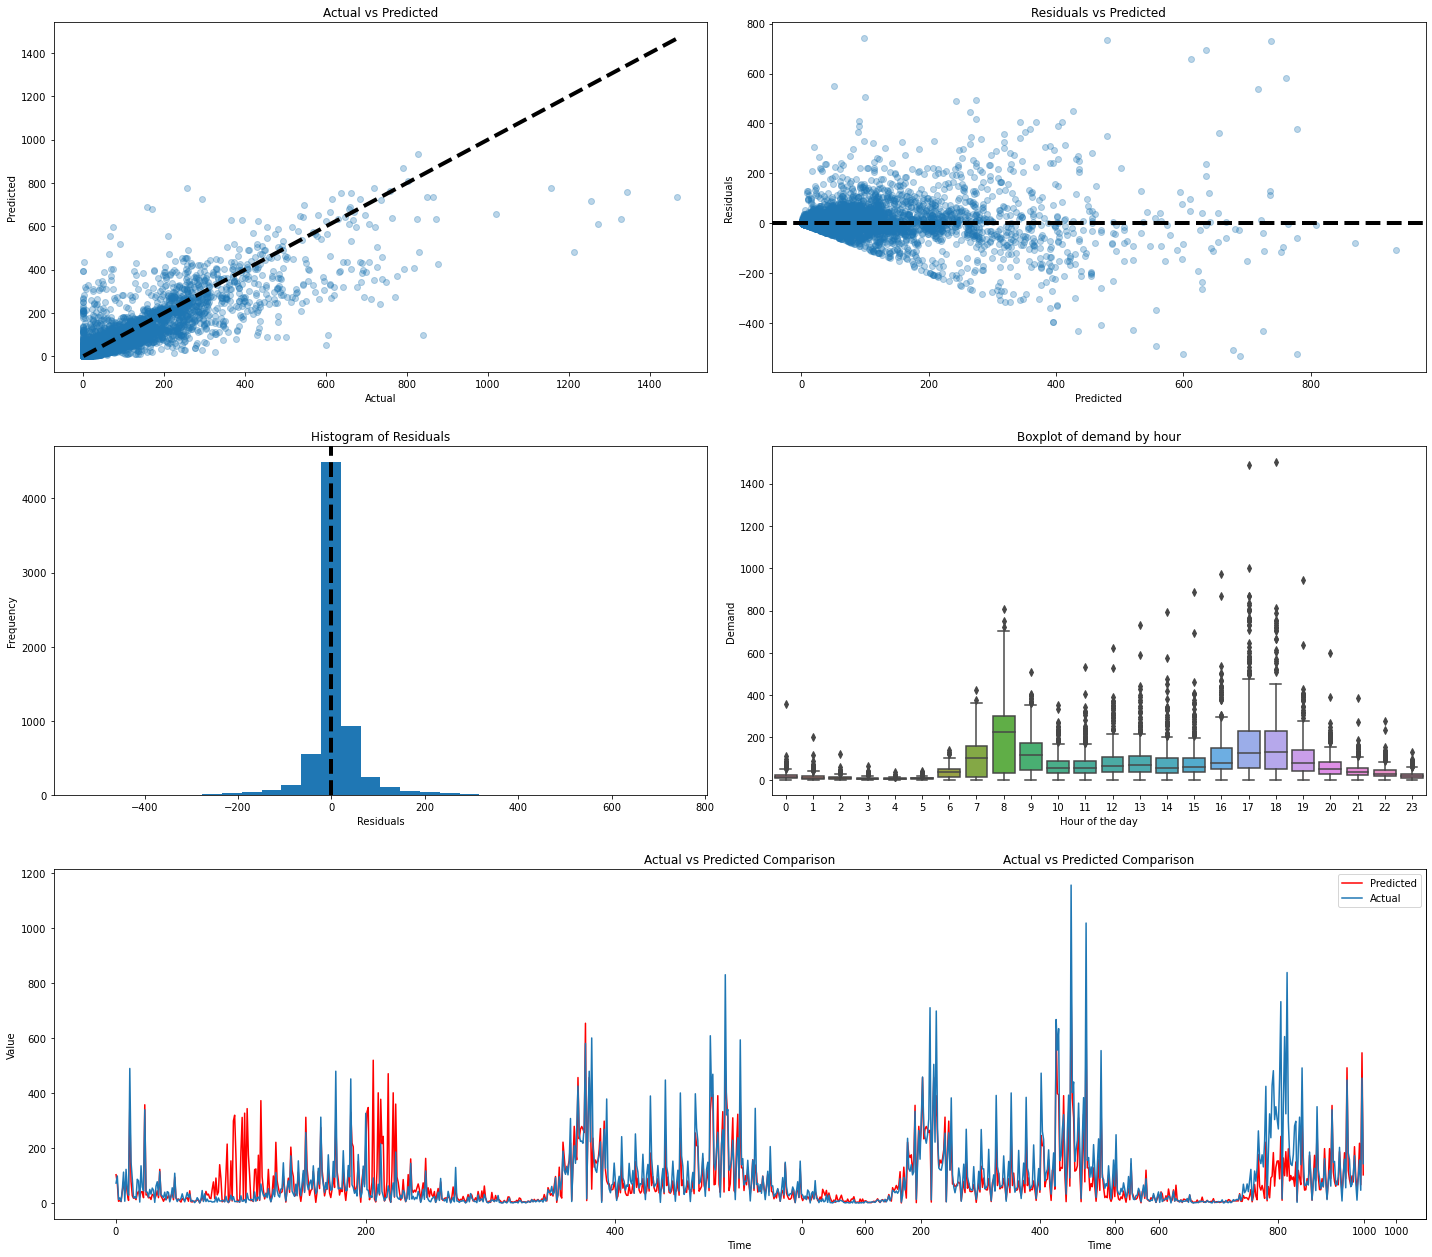

In [ ]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred, train_all)

Heteroscedasticity: the variance of the residuals increases as the predicted values increase

In [ ]:
df_errors, df_errors_entries = model.get_enornous_entrie(y_test, y_pred, x_test)
df_errors.head()

,Actual,Predicted,Error
938,839,98.0,741.0
1058,1213,480.0,733.0
1327,1468,737.0,731.0
1339,1329,635.5,693.5
1046,1272,612.0,660.0


In [ ]:
df_errors_entries.head()

,day_of_week,hour,is_weekend,part_of_day,month,season,bank_holiday,tempmax,tempmin,temp,...,start_borough_Hackney,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster
938,5,8,1.0,1,1.0,4,0.0,6.1,4.0,5.1,...,0,0,0,0,0,0,0,0,0,1
1058,5,18,1.0,4,1.0,4,0.0,6.1,4.0,5.1,...,0,0,0,0,0,0,0,0,0,1
1327,0,17,0.0,4,1.0,4,0.0,11.1,8.1,9.6,...,0,0,0,0,0,0,0,0,0,1
1339,0,18,0.0,4,1.0,4,0.0,11.1,8.1,9.6,...,0,0,0,0,0,0,0,0,0,1
1046,5,17,1.0,4,1.0,4,0.0,6.1,4.0,5.1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
 # Hyperparam tuning


### Model: Random Forest, Log-Transformed

In [361]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Apply a log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the model on the transformed target
rf.fit(x_train, y_train_log)

# Predict on the test set
y_pred_log = rf.predict(x_test)

# Since we transformed the target using log1p (log(1 + x)), we need to transform the predictions back to the original scale using expm1 (exp(x) - 1)
y_pred = np.expm1(y_pred_log)

# Calculate updated evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('Tuned RMSE:', rmse)
print('Tuned MAE:', mae)
print('Tuned R2 Score:', r2)
print('Tuned Explained Variance Score:', evs)


Tuned RMSE: 99.16506108576655
Tuned MAE: 47.1072112205503
Tuned R2 Score: 0.3430311206231823
Tuned Explained Variance Score: 0.4445946429705847


### Model: Gradient Boosting

In [401]:
gb, y_pred_gb = model.gradient_boosting_fit_pred(x_train, y_train, x_test)

In [402]:
rmse, mae, r2 = model.evaluation_metric(y_test, y_pred_gb)


RMSE: 65.10478974748199
MAE: 36.787428593647725
R2 Score: 0.7798182264900467
Explained Variance Score: 0.7799647453245836


### Model: Random Forest, Stand. Demand

Modeling different borough-level effects:
- Interaction terms between boroughs and other important features
- Hierarchical or mixed-effects models: useful when there are multiple levels of grouping in the data -> these models allow for the estimation of borough-level effects that are partially pooled, meaning they learn from the overall trends in the data but also allow for borough-specific deviations
- Standardization 

In [ ]:
x_train_stand, y_train_stand, x_test_stand, y_test_stand = model.aggregate_demand_hourly(journey_train_18, journey_test_19, standardize=True)

In [ ]:
# fit and predict
rf_stand, y_pred_stand = model.random_forest_fit_pred(x_train_stand, y_train_stand, x_test_stand)

In [ ]:
# feature importance
print(model.get_feature_importance(rf_stand, x_train_stand))

                                       Feature  Importance
1                                         hour    0.441258
19                                day_of_month    0.080823
7                                      tempmax    0.046473
0                                  day_of_week    0.038964
3                                  part_of_day    0.034849
2                                   is_weekend    0.033623
15                                  cloudcover    0.019252
14                                   windspeed    0.017913
11                                    humidity    0.016378
20                                 day_of_year    0.016086
62                distance_work_5km_10km_ratio    0.014622
18                              daylight_hours    0.014200
12                                      precip    0.013470
8                                      tempmin    0.013442
16                                  visibility    0.012956
59                            business_density    0.0124

In [ ]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metric(y_test_stand, y_pred_stand)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 0.03280547051094378
MAE: 0.016556801276012695
R2 Score: 0.7814003368253621
Explained Variance Score: 0.781419831158119


In [ ]:
# evaluation visualisation
model.evaluation_vis(y_test_stand, y_pred_stand, x_train_stand)